# Clasificación binaria 

Teniendo en cuenta las características del dataset, se utilizarán técnicas de  clasificación binaria, como aproximación a los algoritmos supervisados. En estos casos se predice una variable categórica (en este caso dicotómica) tomando como input una serie de variables, la mayoría continuas. 
En este trabajo se utiliza la librería 'pycaret' para comprobar algunos algoritmos de Machine Learning. Esta librería permite automatizar un poco el flujo de trabajo y utiliza por debajo librerías como 'scikit-learn'. 
La siguiente lista resume los algoritmos que utiliza pycaret para un problema como este de clasificación binaria: 

1. Ridge classifier

2. Linear Discriminant Analysis (LDA) 

3. Gradient Boosting Classifier

4. Ada Boost Classifier 

5. Light Gradient Boosting Machine 

6. Random Forest Classifier 

7. Extreme Gradient Boosting 

8. Extra trees Classifier 

9. Logistic Regression 

10. k-Neighbors Classifier 

11. SVM - Linear Kernel 

12. Decision Tree Classifier 

13. Quadratic Discriminant Analysis 

14. Naive Bayes 

15. CatBoost Classifier 



## 1. Importar librerias

In [1]:
# numpy y pandas 
import numpy as np
import pandas as pd 

# gestión de archivos
import os

# eliminar errores 
import warnings
warnings.filterwarnings('ignore')

# matplotlib y seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# pycaret
from pycaret.classification import *

## 2. Importar datos y preprocesamiento 

In [2]:
path ='LiverPatient.csv'

dataset =pd.read_csv(path, header =0)
# añadir nombres columnas 
dataset.columns= ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'Status']

# transformar la variable 'Gender' 
dataset['Gender'].replace('Female',0 ,inplace=True)
dataset['Gender'].replace('Male',1,inplace=True)

dataset.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [3]:
# eliminar datos faltantes
dataset = dataset.dropna()

Se transforma la variable 'Status' que tiene dos categorías 1 y 2 a 0 y 1. 

In [4]:
data = np.array(dataset['Status']).copy()
data[data == 1] = 0
data[data == 2] = 1

In [5]:
#se quita la variable objetivo
dataset.drop('Status', inplace=True, axis=1)

dataset['Status'] = data.tolist()
dataset.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,0


## 3. Puesta a punto 
Debe utilizarse la función setup () antes de ejecutar otras funciones en pycaret. Requiere dos parámetros obligatorios: un dataframe y el nombre de la variable objetivo.

In [6]:
exp_clf101 = setup(data = dataset, target = 'Status', session_id=123) 



,Description,Value
0,session_id,123
1,Target,Status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(578, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


## 4. Modelos


Los modelos se comparan y evalúan con la siguiente función. La evaluación se medirá utilizando las siguientes métricas: 

- Accuracy: número de predicciones correctas del total de predicciones.  
- AUC (Area Under ROC curve): ROC es una curva de probabilidad, y AUC mide la separabilidad. Cuanto más altos sean los valores de AUC mejor será el modelo. 
- Recall: es la sensivilidad, el número de positivos devueltos por el modelo.  
- Precision: número de predicciones correctas. 
- F1 Score: media harmónica de las métricas de precission y recall, toma valores entre 0 y 1.  
- Kappa: compara la 'accuracy' observada con la esperada, se utiliza principalmente en casos de múltiples clases o de datos desbalanceados.  

In [7]:
#comparacion de los modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.7129,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060
et,Extra Trees Classifier,0.7032,0.7208,0.2773,0.4855,0.3488,0.1749,0.1885,0.0750
ridge,Ridge Classifier,0.7007,0.0000,0.0182,0.1000,0.0308,-0.0077,-0.0156,0.0080
lightgbm,Light Gradient Boosting Machine,0.6934,0.7118,0.3061,0.4542,0.3578,0.1710,0.1790,0.0180
lr,Logistic Regression,0.6930,0.7217,0.1818,0.3906,0.2407,0.0979,0.1108,0.9420
gbc,Gradient Boosting Classifier,0.6882,0.6931,0.2864,0.4384,0.3333,0.1486,0.1575,0.0370
lda,Linear Discriminant Analysis,0.6833,0.6965,0.0265,0.1667,0.0440,-0.0322,-0.0477,0.0070
rf,Random Forest Classifier,0.6832,0.7087,0.2174,0.3837,0.2733,0.0992,0.1030,0.0890
dt,Decision Tree Classifier,0.6710,0.5908,0.4008,0.4252,0.4028,0.1807,0.1849,0.0070
ada,Ada Boost Classifier,0.6658,0.6760,0.3121,0.4138,0.3485,0.1320,0.1376,0.0350


Atendiendo a la tabla de arriba, el mejor modelo es Naive Bayes, pese a no tener los mejores valores de 'Accuracy' o 'Precission' otros parámetros son mucho mejores, por ejemplo capa (que como se ha dicho anteriormente es una gran métrica cuando se trabaja con datos desbalanceados como es este caso). 

### 4.1. Validación fold  

Se utiliza para estimar como funciona de bien este modelo con el dataset. Este método está menos sesgado y es menos optimista que otros métodos como los de entrenamiento y test. Es un método de resamplig que utiliza distintas particiones de los datos en varias iteraciones para realizar una evaluación. 

In [8]:
#fold validation
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5122,0.7557,0.9167,0.3667,0.5238,0.1816,0.2685
1,0.6585,0.7586,1.0000,0.4615,0.6316,0.3854,0.4886
2,0.4390,0.6121,0.9167,0.3333,0.4889,0.1045,0.1815
3,0.5122,0.5833,0.9167,0.3667,0.5238,0.1816,0.2685
4,0.5000,0.6113,1.0000,0.3548,0.5238,0.1984,0.3318
5,0.6250,0.8464,1.0000,0.4231,0.5946,0.3392,0.4519
6,0.5750,0.7492,0.8182,0.3750,0.5143,0.2202,0.2743
7,0.5500,0.5486,1.0000,0.3793,0.5500,0.2516,0.3793
8,0.6250,0.7440,1.0000,0.4444,0.6154,0.3421,0.4543


### 4.2. Polt AUC 

En el eje Y está la tasa de verdaderos positivos y en las X la de los falsos positivos. La esquina superior izquierda es el punto perfecto con una tasa de falsos positivos de 0 y una tasa de verdaderos positivos de 1. Cuanto mayor sea el área por debajo de la curva (AUC) mejor será el modelo. 

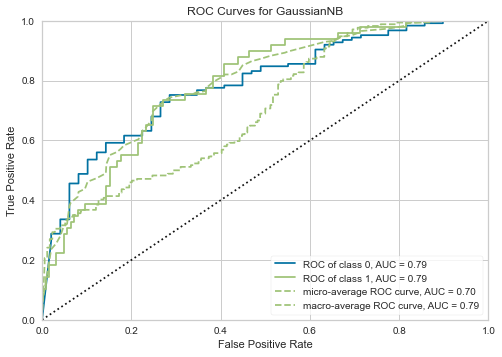

In [9]:
plot_model(nb, plot = 'auc')

### 4.3. Curva de Precision-Recall 


It is a great measure of the goodness of the model when the classes are very imbalanced. The precision-recall curve shows the trade-off between precision and recall for different threshold. A high area under the curve represents both high recall and high precision. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

Es una buena medida de la bondad de un modelo cuando las clases están desbalanceadas. Muestra el trade-off entre precission y recall. 

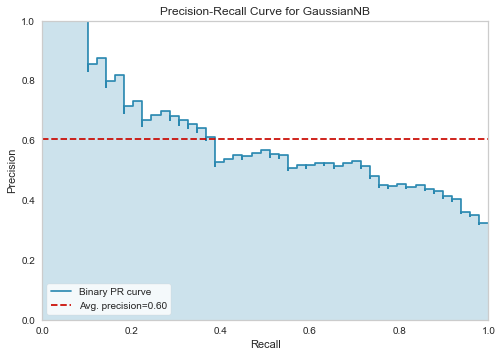

In [10]:
# precision-recall
plot_model(nb, plot = 'pr')

### 4.4. Matriz de confusión
La columna de la izquierda (0) contiene el número de negativos, en la parte de arriba los reales y debajo los erroneos. En la derecha se representan los positivos, arriba los erroneos y debajo los reales. 


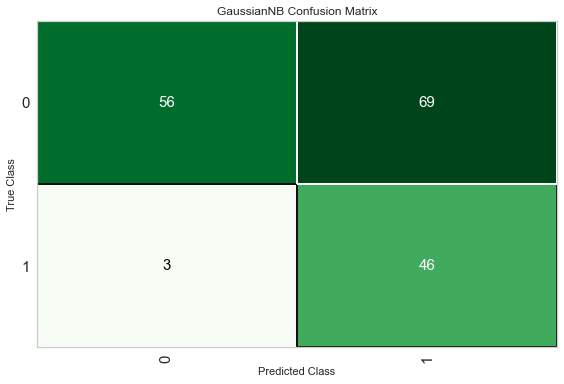

In [11]:
plot_model(nb, plot = 'confusion_matrix')

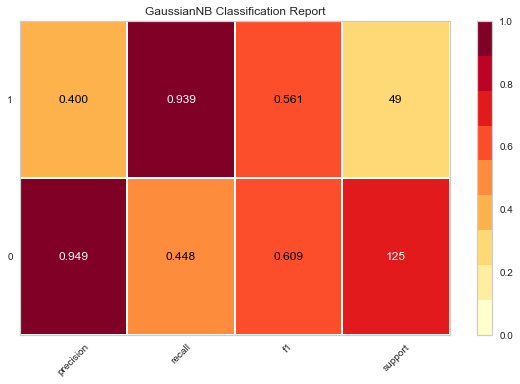

In [14]:
plot_model(nb, plot='class_report')